# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 20)
pd.options.display.max_columns=300

In [2]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [3]:
data = pd.read_csv('../../Data/zillow_data.csv')
data

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08  \
0           Cook         1  334200.0  335400.0  336500.0  337600.0  338500.0   
1         Collin         2  235700.0  236900.0  236700.0  235400.0  233300.0   
2         Harris         3  210400.0  212200.0  212200.0  210700.0  208300.0   
3           Cook         4  498100.0  500900.0  503100.0  504600.0  505500.0   
4        El Paso         5   77300.0   77300.0   77300.0   77300.0   77400.0   
...          ...       ...       ...       ...       ...       ...       ...   
14718   Franklin     14719   94600.0   94300.0   94000.0   93700.0   93400.0   
14719    Grafton     14720   92700.0   92500.0   92400.0   92200.0   92100.0   
14720    Madison     14721   57100.0   57300.0   57500.0   57700.0   58000.0   
14721   Gunnison     14722  191100.0  192400.0  193700.0  195000.0  196300.0   
14722      Clark     14723  176400.0  176300.0  176100.0  176000.0  175900.0   

        1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03  \
0      339500.0  340400.0  341300.0  342600.0  344400.0  345700.0  346700.0   
1      230600.0  227300.0  223400.0  219600.0  215800.0  211100.0  205700.0   
2      205500.0  202500.0  199800.0  198300.0  197300.0  195400.0  193000.0   
3      505700.0  505300.0  504200.0  503600.0  503400.0  502200.0  500000.0   
4       77500.0   77600.0   77700.0   77700.0   77800.0   77900.0   77900.0   
...         ...       ...       ...       ...       ...       ...       ...   
14718   93200.0   93000.0   92900.0   92700.0   92600.0   92600.0   92600.0   
14719   91900.0   91700.0   91300.0   90900.0   90500.0   90100.0   89800.0   
14720   58200.0   58400.0   58700.0   59100.0   59500.0   59900.0   60300.0   
14721  197700.0  199100.0  200700.0  202600.0  204900.0  207100.0  209100.0   
14722  175800.0  175800.0  176000.0  176200.0  176500.0  176700.0  176800.0   

        1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10  \
0      347800.0  349000.0  350400.0  352000.0  353900.0  356200.0  358800.0   
1      200900.0  196800.0  193600.0  191400.0  190400.0  190800.0  192700.0   
2      191800.0  191800.0  193000.0  195200.0  198400.0  202800.0  208000.0   
3      497900.0  496300.0  495200.0  494700.0  494900.0  496200.0  498600.0   
4       77800.0   77800.0   77800.0   77800.0   77800.0   77900.0   78100.0   
...         ...       ...       ...       ...       ...       ...       ...   
14718   92800.0   93100.0   93500.0   94000.0   94500.0   95100.0   95800.0   
14719   89600.0   89400.0   89300.0   89200.0   89100.0   88900.0   88700.0   
14720   60800.0   61300.0   62000.0   62600.0   63200.0   63800.0   64500.0   
14721  211200.0  213400.0  215800.0  218300.0  221000.0  223900.0  226900.0   
14722  176800.0  176900.0  177000.0  177100.0  177200.0  177400.0  177600.0   

        1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05  \
0      361800.0  365700.0  370200.0  374700.0  378900.0  383500.0  388300.0   
1      196000.0  201300.0  207400.0  212200.0  214600.0  215100.0

In [4]:
texas_data= data[data['State'] == 'TX']
texas_data

RegionID  RegionName           City State              Metro  \
1         90668       75070       McKinney    TX  Dallas-Fort Worth   
2         91982       77494           Katy    TX            Houston   
4         93144       79936        El Paso    TX            El Paso   
5         91733       77084        Houston    TX            Houston   
8         91940       77449           Katy    TX            Houston   
...         ...         ...            ...   ...                ...   
14372     91640       76941        Mertzon    TX         San Angelo   
14472     92897       79313          Anton    TX          Levelland   
14492     92921       79355         Plains    TX                NaN   
14599     92929       79366  Ransom Canyon    TX            Lubbock   
14695     91948       77457      Matagorda    TX           Bay City   

      CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08  \
1         Collin         2  235700.0  236900.0  236700.0  235400.0  233300.0   
2         Harris         3  210400.0  212200.0  212200.0  210700.0  208300.0   
4        El Paso         5   77300.0   77300.0   77300.0   77300.0   77400.0   
5         Harris         6   95000.0   95200.0   95400.0   95700.0   95900.0   
8         Harris         9   95400.0   95600.0   95800.0   96100.0   96400.0   
...          ...       ...       ...       ...       ...       ...       ...   
14372      Irion     14373       NaN       NaN       NaN       NaN       NaN   
14472    Hockley     14473       NaN       NaN       NaN       NaN       NaN   
14492     Yoakum     14493       NaN       NaN       NaN       NaN       NaN   
14599    Lubbock     14600  134500.0  134500.0  134400.0  134400.0  134300.0   
14695  Matagorda     14696   90700.0   91000.0   91200.0   91500.0   91800.0   

        1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03  \
1      230600.0  227300.0  223400.0  219600.0  215800.0  211100.0  205700.0   
2      205500.0  202500.0  199800.0  198300.0  197300.0  195400.0  193000.0   
4       77500.0   77600.0   77700.0   77700.0   77800.0   77900.0   77900.0   
5       96100.0   96200.0   96100.0   96000.0   95800.0   95500.0   95300.0   
8       96700.0   96800.0   96800.0   96700.0   96600.0   96400.0   96200.0   
...         ...       ...       ...       ...       ...       ...       ...   
14372       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14472       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14492       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14599  134200.0  134200.0  134300.0  134400.0  134500.0  134500.0  134400.0   
14695   92200.0   92500.0   92900.0   93400.0   93900.0   94400.0   94800.0   

        1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10  \
1      200900.0  196800.0  193600.0  191400.0  190400.0  190800.0  192700.0   
2      191800.0  191800.0  193000.0  195200.0  198400.0  202800.0  208000.0   
4       77800.0   77800.0   77800.0   77800.0   77800.0   77900.0   78100.0   
5       95100.0   95100.0   95200.0   95400.0   95600.0   95800.0   96000.0   
8       96100.0   96200.0   96300.0   96600.0   97000.0   97500.0   98000.0   
...         ...       ...       ...       ...       ...       ...       ...   
14372       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14472       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14492       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14599  134300.0  134200.0  134000.0  133900.0  133700.0  133600.0  133400.0   
14695   95300.0   95900.0   96500.0   97200.0   97900.0   98700.0   99600.0   

        1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05  \
1      196000.0  201300.0  207400.0  212200.0  214600.0  215100.0  213400.0   
2      213800.0  220700.0  227500.0  231800.0  233400.0  233900.0  233500.0   
4       78200.0   78400.0   78600.0   78800.0   79000.0   

In [5]:
austin_city = texas_data[texas_data['Metro'] == 'Austin']
austin_city

RegionID  RegionName          City State   Metro  CountyName  SizeRank  \
18        92593       78660  Pflugerville    TX  Austin      Travis        19   
32        92551       78613    Cedar Park    TX  Austin  Williamson        33   
66        92617       78704        Austin    TX  Austin      Travis        67   
77        92598       78666    San Marcos    TX  Austin        Hays        78   
98        92654       78745        Austin    TX  Austin      Travis        99   
...         ...         ...           ...   ...     ...         ...       ...   
10440     92585       78652    San Leanna    TX  Austin      Travis     10441   
10970     92557       78619     Driftwood    TX  Austin        Hays     10971   
12221     92592       78659         Paige    TX  Austin     Bastrop     12222   
12831     92588       78655    Martindale    TX  Austin    Caldwell     12832   
12908     91454       76530       Granger    TX  Austin  Williamson     12909   

        1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
18     138900.0  138600.0  138400.0  138500.0  138700.0  139000.0  139300.0   
32     169600.0  169000.0  168600.0  168500.0  168700.0  169200.0  169900.0   
66     221300.0  221100.0  221000.0  221000.0  221300.0  221900.0  223000.0   
77     103100.0  103000.0  103000.0  103000.0  103000.0  103200.0  103500.0   
98     135000.0  134200.0  133800.0  133800.0  134000.0  134400.0  135000.0   
...         ...       ...       ...       ...       ...       ...       ...   
10440  144600.0  144600.0  144700.0  144700.0  144800.0  144900.0  145000.0   
10970  298000.0  298000.0  297900.0  297800.0  297700.0  297400.0  297100.0   
12221   54300.0   55000.0   55700.0   56300.0   57000.0   57700.0   58400.0   
12831   68600.0   69000.0   69400.0   69900.0   70300.0   70800.0   71400.0   
12908       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05  \
18     139600.0  139900.0  140200.0  140600.0  141300.0  141800.0  142200.0   
32     170700.0  171500.0  172400.0  173500.0  175000.0  176500.0  178100.0   
66     224800.0  227200.0  230100.0  233500.0  237600.0  242100.0  246600.0   
77     103800.0  104200.0  104600.0  105100.0  105800.0  106400.0  107000.0   
98     135600.0  136100.0  136300.0  136400.0  136500.0  136300.0  135800.0   
...         ...       ...       ...       ...       ...       ...       ...   
10440  145200.0  145300.0  145500.0  145600.0  145500.0  145400.0  145300.0   
10970  296500.0  296000.0  296100.0  296700.0  297000.0  297000.0  296700.0   
12221   59100.0   59800.0   60500.0   61300.0   62000.0   62800.0   63500.0   
12831   71900.0   72600.0   73300.0   74100.0   74800.0   75700.0   76500.0   
12908       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12  \
18     142400.0  142400.0  142100.0  141800.0  141400.0  141000.0  140600.0   
32     179900.0  181900.0  184200.0  186600.0  189000.0  191500.0  193700.0   
66     251200.0  255500.0  259500.0  263000.0  266100.0  268700.0  270600.0   
77     107500.0  107900.0  108200.0  108400.0  108400.0  108300.0  108100.0   
98     135100.0  134300.0  133500.0  132700.0  132000.0  131700.0  131600.0   
...         ...       ...       ...       ...       ...       ...       ...   
10440  145300.0  145200.0  145200.0  145200.0  145300.0  145500.0  145700.0   
10970  296300.0  295900.0  295500.0  294900.0  294100.0  292900.0  291900.0   
12221   64200.0   64900.0   65600.0   66300.0   66900.0   67500.0   68100.0   
12831   77400.0   78400.0   79400.0   80500.0   81600.0   82700.0   83900.0   
12908       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07  \
18     140100.0  139600.0  139100.0  138500.0  138000.0  137400.0  136900.0   
32     195800.0  198100.0  20

In [6]:
# I'm working on these since Emine is doing the first 37
austin_city['RegionName'].tail(36)

4969     78751
5068     78735
5209     78621
5213     78754
5307     78752
         ...  
10440    78652
10970    78619
12221    78659
12831    78655
12908    76530
Name: RegionName, Length: 36, dtype: int64

In [7]:
zip_78751 = melt_data(austin_city[austin_city['RegionName'] == 78751])
zip_78735 = melt_data(austin_city[austin_city['RegionName'] == 78735])
zip_78621 = melt_data(austin_city[austin_city['RegionName'] == 78621])
zip_78754 = melt_data(austin_city[austin_city['RegionName'] == 78754])
zip_78752 = melt_data(austin_city[austin_city['RegionName'] == 78752])
zip_78653 = melt_data(austin_city[austin_city['RegionName'] == 78653])
zip_76574 = melt_data(austin_city[austin_city['RegionName'] == 76574])
zip_78644 = melt_data(austin_city[austin_city['RegionName'] == 78644])
zip_78620 = melt_data(austin_city[austin_city['RegionName'] == 78620])
zip_78676 = melt_data(austin_city[austin_city['RegionName'] == 78676])
zip_78617 = melt_data(austin_city[austin_city['RegionName'] == 78617])
zip_78724 = melt_data(austin_city[austin_city['RegionName'] == 78724])
zip_78747 = melt_data(austin_city[austin_city['RegionName'] == 78747])
zip_78737 = melt_data(austin_city[austin_city['RegionName'] == 78737])
zip_78739 = melt_data(austin_city[austin_city['RegionName'] == 78739])
zip_78726 = melt_data(austin_city[austin_city['RegionName'] == 78726])
zip_78732 = melt_data(austin_city[austin_city['RegionName'] == 78732])
zip_78645 = melt_data(austin_city[austin_city['RegionName'] == 78645])
zip_78642 = melt_data(austin_city[austin_city['RegionName'] == 78642])
zip_78669 = melt_data(austin_city[austin_city['RegionName'] == 78669])
zip_78612 = melt_data(austin_city[austin_city['RegionName'] == 78612])
zip_78756 = melt_data(austin_city[austin_city['RegionName'] == 78756])
zip_78957 = melt_data(austin_city[austin_city['RegionName'] == 78957])
zip_78721 = melt_data(austin_city[austin_city['RegionName'] == 78721])
zip_78730 = melt_data(austin_city[austin_city['RegionName'] == 78730])
zip_78736 = melt_data(austin_city[austin_city['RegionName'] == 78736])
zip_78648 = melt_data(austin_city[austin_city['RegionName'] == 78648])
zip_78733 = melt_data(austin_city[austin_city['RegionName'] == 78733])
zip_78722 = melt_data(austin_city[austin_city['RegionName'] == 78722])
zip_78725 = melt_data(austin_city[austin_city['RegionName'] == 78725])
zip_78616 = melt_data(austin_city[austin_city['RegionName'] == 78616])
zip_78652 = melt_data(austin_city[austin_city['RegionName'] == 78652])
zip_78619 = melt_data(austin_city[austin_city['RegionName'] == 78619])
zip_78659 = melt_data(austin_city[austin_city['RegionName'] == 78659])
zip_78655 = melt_data(austin_city[austin_city['RegionName'] == 78655])
zip_76530 = melt_data(austin_city[austin_city['RegionName'] == 76530])

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(zip_78751)[1]

0.6760184023107004

## Function for ADFuller Test

In [9]:
def fuller_test(zip_list):
    """Takes in a list of zip codes and outputs the results of the adjusted Dickey-Fuller test"""
    p_vals = []
    for z in zip_list:
        dftest = adfuller(z)
        p_vals.append(dftest[1])
    print(p_vals)

In [10]:
atx = [zip_78751, zip_78735, zip_78621, zip_78754, zip_78752, zip_78653, zip_76574, zip_78644,
       zip_78620, zip_78676, zip_78617, zip_78724, zip_78747, zip_78737, zip_78739, zip_78726,
       zip_78732, zip_78645, zip_78642, zip_78669, zip_78612, zip_78756, zip_78957, zip_78721,
       zip_78730, zip_78736, zip_78648, zip_78733, zip_78722, zip_78725, zip_78616, zip_78652,
       zip_78619, zip_78659, zip_78655, zip_76530] 

In [11]:
fuller_test(atx)

[0.6760184023107004, 3.293458081320103e-06, 0.9905342142145832, 0.9938738597017469, 0.9490053134266835, 0.9594649426471038, 0.9617894617545852, 0.81926806124094, 0.9949808522532465, 0.9979708616724775, 0.8848908085232841, 0.8291997227753714, 0.9869405440096627, 0.9792988539727427, 0.625252525013429, 0.8401832992269757, 0.9564815198270582, 0.9918662575714268, 0.9952083273659601, 0.9744942669017022, 0.9968014778663471, 0.9160280751170138, 0.9974513446860688, 0.9294752993655944, 0.7639508871278782, 0.9965099745714691, 0.9562790977444416, 0.9789158844678691, 0.7986875626477575, 0.9899371036386057, 0.9857412246880389, 0.9989049810730645, 0.9699152924399597, 0.9975829058698776, 0.9857648803118991, 0.004858510423601573]


In [12]:
zd = {'78751': zip_78751, '78735': zip_78735, '78621': zip_78621, '78754': zip_78754, '78752': zip_78752, 
      '78653': zip_78653, '76574': zip_76574, '78644': zip_78644, '78620': zip_78620, '78676': zip_78676, 
      '78617': zip_78617, '78724': zip_78724, '78747': zip_78747, '78737': zip_78737, '78739': zip_78739, 
      '78726': zip_78726, '78732': zip_78732, '78645': zip_78645, '78642': zip_78642, '78669': zip_78669, 
      '78612': zip_78612, '78756': zip_78756, '78957': zip_78957, '78721': zip_78721, '78730': zip_78730, 
      '78736': zip_78736, '78648': zip_78648, '78733': zip_78733, '78722': zip_78722, '78725': zip_78725, 
      '78616': zip_78616, '78652': zip_78652, '78619': zip_78619, '78659': zip_78659, '78655': zip_78655, 
      '76530': zip_76530}

In [13]:
zd['78735']

value
time                
1996-04-01  772100.0
1996-05-01  765800.0
1996-06-01  760200.0
1996-07-01  755200.0
1996-08-01  751100.0
...              ...
2017-12-01  473200.0
2018-01-01  473500.0
2018-02-01  475500.0
2018-03-01  479300.0
2018-04-01  482200.0

[265 rows x 1 columns]

In [14]:
zd.keys()
adfuller(zd['78751'])

(-1.1943571463654323,
 0.6760184023107004,
 15,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 3885.387774526975)

In [15]:
def fuller_test_2(zip_dict):
    """Takes in a dictionary of zip codes and outputs the p-value from the adjusted Dickey-Fuller test"""
    keys = []
    p_vals = []
    for key in zip_dict:
        df = zip_dict[key]
        p_vals.append(adfuller(df)[1])
        keys.append(key)
    l = list(zip(keys,p_vals)) 
    l.sort(key=lambda tup: tup[1])
    return l

In [16]:
fuller_test_2(zd)

[('78735', 3.293458081320103e-06),
 ('76530', 0.004858510423601573),
 ('78739', 0.625252525013429),
 ('78751', 0.6760184023107004),
 ('78730', 0.7639508871278782),
 ('78722', 0.7986875626477575),
 ('78644', 0.81926806124094),
 ('78724', 0.8291997227753714),
 ('78726', 0.8401832992269757),
 ('78617', 0.8848908085232841),
 ('78756', 0.9160280751170138),
 ('78721', 0.9294752993655944),
 ('78752', 0.9490053134266835),
 ('78648', 0.9562790977444416),
 ('78732', 0.9564815198270582),
 ('78653', 0.9594649426471038),
 ('76574', 0.9617894617545852),
 ('78619', 0.9699152924399597),
 ('78669', 0.9744942669017022),
 ('78733', 0.9789158844678691),
 ('78737', 0.9792988539727427),
 ('78616', 0.9857412246880389),
 ('78655', 0.9857648803118991),
 ('78747', 0.9869405440096627),
 ('78725', 0.9899371036386057),
 ('78621', 0.9905342142145832),
 ('78645', 0.9918662575714268),
 ('78754', 0.9938738597017469),
 ('78620', 0.9949808522532465),
 ('78642', 0.9952083273659601),
 ('78736', 0.9965099745714691),
 ('786

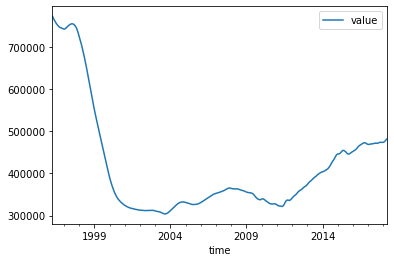

In [17]:
zip_78735.plot();

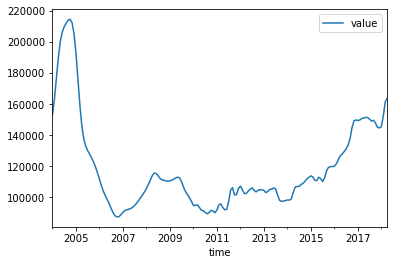

In [18]:
zip_76530.plot();

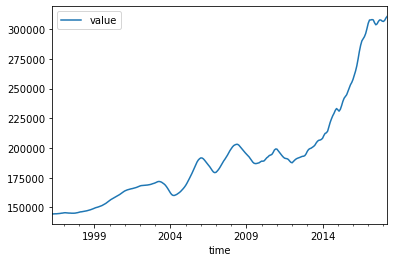

In [19]:
zip_78652.plot();

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Fit an ARMA model - what should our parameters be?
arima_order = (1,1,0) #should be a tuple, like (0,0,0)
mod_arima = ARIMA(zip_76530, 
                 order=arima_order)
res_arima = mod_arima.fit()

# Print out summary information on the fit
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  172
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1631.203
Date:                Wed, 17 Nov 2021   AIC                           3266.405
Time:                        07:47:20   BIC                           3272.689
Sample:                    01-01-2004   HQIC                          3268.955
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1562      0.006     24.660      0.000       0.144       0.169
sigma2      1.105e+07   5.62e-13   1.96e+19      0.000     1.1e+07     1.1e+07
Ljung-Box (L1) (Q):                  73.79   Jarque-

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
"""From Machine Learning Mastery by Jason Brownlee 
(https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/)"""
# grid search persistence models
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
    return None
 
# forecast with a pre-fit model
def model_predict(model, history, offset):
    return history[-offset]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error
 
# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [23]:
# define dataset
series = zip_76530
data = series.values
# data split
n_test = 12
# model configs
cfg_list = [1, 6, 12, 24, 36]
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores:
    print(cfg, error)

 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
> Model[1] 3554.223
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
> Model[6] 6727.679
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
> Model[12] 13318.471
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
> Model[24] 33496.181
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
> Model[36] 41398.843
done
1 3554.222840509582
6 6727.67914415266
12 13318.47088320077
24 33496.18137439947
36 41398.84257641349


## Plotting

In [24]:
# x = np.arange(test.shape[0])
# plt.plot(x, test, color='orange', label='Actual')
# plt.plot(zip_76530.index, res_arima.predict(n_periods=zip_76530.shape[0]), color='green', label='Predicted')
# plt.title('Actual test samples vs. forecasts')
# plt.legend()
# plt.show()

In [25]:
# fig, ax = plt.subplots()

# ts['hour'] = ts.index
# ts['hour'] = ts.hour.apply(lambda x: x.hour)
# ts['business_hours'] = ts.hour.apply(lambda x: 9 <= x <= 17)

# bh_ratio = ts.business_hours.value_counts()[1]/len(ts)

# x = ts.business_hours.value_counts().index
# y = ts.business_hours.value_counts()
# sns.barplot(x=x, y=y)

# ax.set_title(f'{bh_ratio: 0.2%} of Offenses\n Happen Btwn 9 and 5');

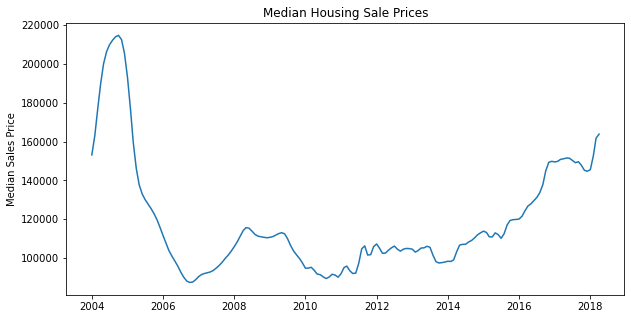

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(zip_76530.index, zip_76530.values)
ax.set_title('Median Housing Sale Prices')
ax.set_ylabel('Median Sales Price');

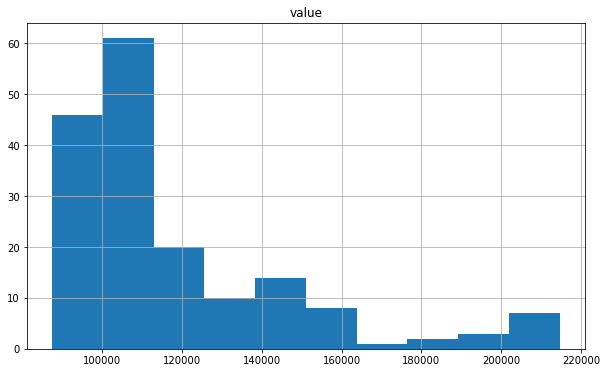

In [27]:
zip_76530.hist(figsize=(10, 6))
plt.show()

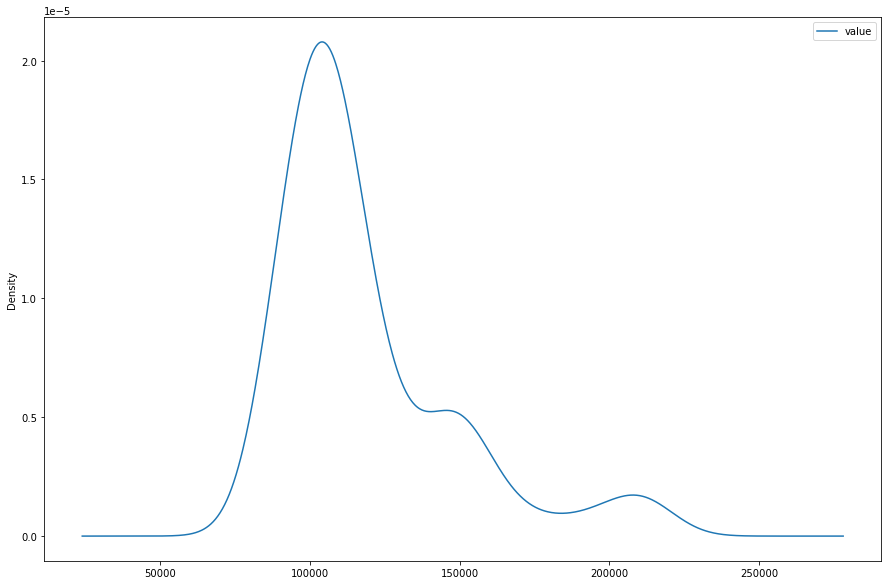

In [28]:
zip_76530.plot(kind='kde', figsize=(15, 10))
plt.show()

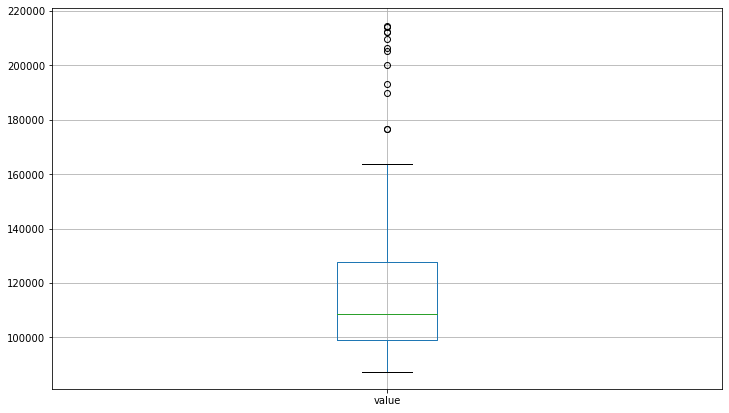

In [29]:
zip_76530.boxplot(figsize=(12, 7))
plt.show()

## Model Functions

In [30]:
def arima_models(ts, order=(1,0,0)):
    model = ARIMA(ts, order=order)
    model_fit = model.fit()
    return model_fit.aic

In [31]:
arima_models(zip_76530, order=(1,0,0))

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


3334.219051085667

In [32]:
year = zip_76530.groupby(pd.Grouper(freq='A')).mean()
year

value
time                     
2004-12-31  196433.333333
2005-12-31  140625.000000
2006-12-31   96183.333333
2007-12-31   95633.333333
2008-12-31  111691.666667
2009-12-31  107583.333333
2010-12-31   92116.666667
2011-12-31   98225.000000
2012-12-31  104641.666667
2013-12-31  102225.000000
2014-12-31  106066.666667
2015-12-31  114425.000000
2016-12-31  133083.333333
2017-12-31  149233.333333
2018-12-31  155900.000000

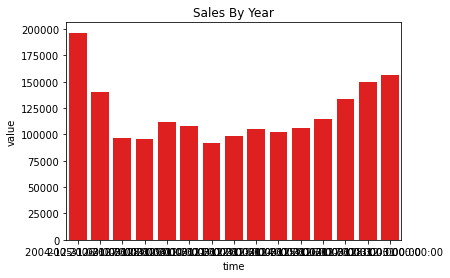

In [33]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x=year.index, y=year.value, color= 'r', ax=ax)

ax.set_title("Sales By Year");

# Step 2: Data Preprocessing

In [34]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

## Train-Test Split

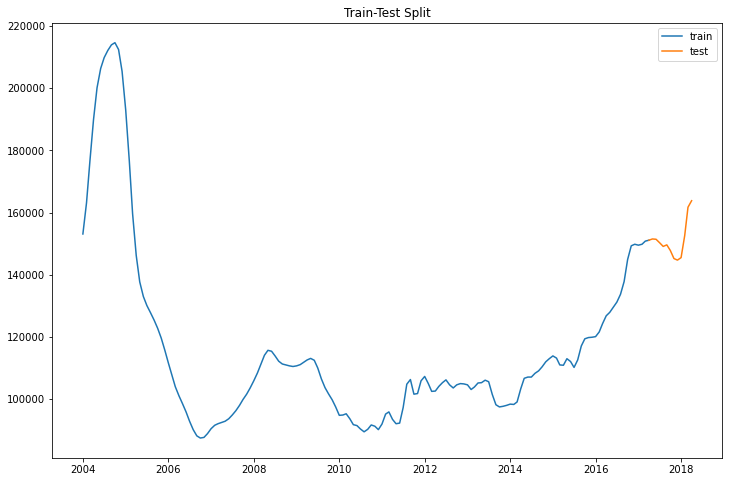

In [35]:
cutoff = '2017-04-01'
cutoff

# Define train and test sets according to the index found above
train = zip_76530[:cutoff]

test = zip_76530[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [36]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] [56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81] [ 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52 

## Baseline Model

In [37]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive = train.shift(1)
naive

value
time                
2004-01-01       NaN
2004-02-01  153100.0
2004-03-01  163100.0
2004-04-01  176500.0
2004-05-01  189900.0
...              ...
2016-12-01  149300.0
2017-01-01  149800.0
2017-02-01  149500.0
2017-03-01  149800.0
2017-04-01  150800.0

[160 rows x 1 columns]

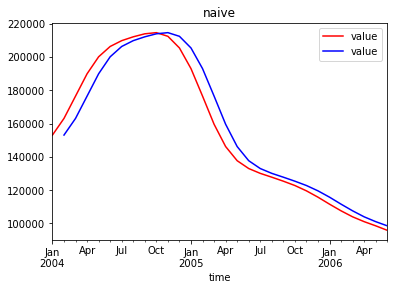

In [38]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

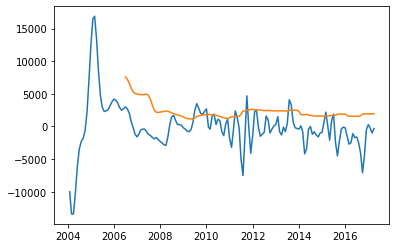

In [39]:
fig, ax = plt.subplots()
residuals = naive[1:] - train[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

In [40]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train[1:], naive.dropna()))

3823.7917892843934

In [41]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

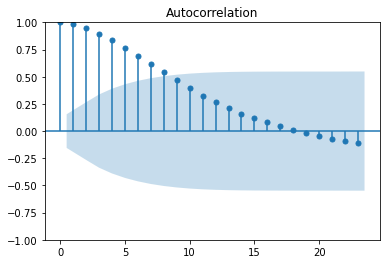

In [42]:
plot_acf(train);

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


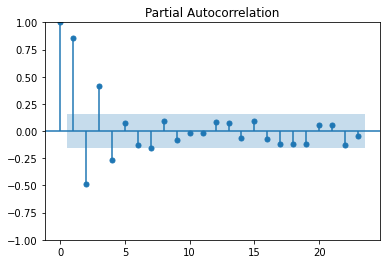

In [43]:
plot_pacf(train.diff().dropna());

# Step 3: EDA and Visualization

In [44]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [45]:
# Copying from Emine's notebook
df = pd.DataFrame()
for i in austin_city['RegionName']:
    x = melt_data(austin_city[austin_city['RegionName'] == i])  
    df = pd.concat([df, x], axis=1)
    df.rename(columns = {'value':i}, inplace = True)
# Look into the new dataframe
df.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=265, freq='MS')

In [46]:
# We will drop two zipcodes since they have missing values: 78616, 76530
df.drop(columns=[78616, 76530], inplace=True)

In [47]:
# Return for each zipcode!  (current homeprice - previous homeprice)/previous homeprice
df_return = df.pct_change()
df_return

78660     78613     78704     78666     78745     78641  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01 -0.002160 -0.003538 -0.000904 -0.000970 -0.005926 -0.004557   
1996-06-01 -0.001443 -0.002367 -0.000452  0.000000 -0.002981 -0.003270   
1996-07-01  0.000723 -0.000593  0.000000  0.000000  0.000000 -0.002625   
1996-08-01  0.001444  0.001187  0.001357  0.000000  0.001495 -0.000658   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.003774  0.001352  0.002973  0.003047  0.002415  0.003997   
2018-01-01  0.002506 -0.001013  0.000741  0.002025  0.002754  0.002787   
2018-02-01  0.004167  0.001690  0.003887  0.011117  0.004463  0.003573   
2018-03-01  0.004979  0.003711  0.008851  0.018491  0.004785  0.003560   
2018-04-01  0.002477 -0.000672  0.006946  0.013248  0.002381  0.001577   

               78758     78741     78753     78759     78664     78748  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01 -0.005426 -0.002132 -0.006289  0.009760 -0.003005 -0.003509   
1996-06-01 -0.006235 -0.001068 -0.006329  0.011152 -0.002261 -0.004527   
1996-07-01 -0.004706 -0.001070 -0.006369  0.011397 -0.002266 -0.006064   
1996-08-01 -0.004728  0.000000 -0.005495  0.011269 -0.001514 -0.008134   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.010488  0.017941  0.008516  0.006827  0.004794  0.006548   
2018-01-01  0.018363  0.011330  0.009333  0.001808  0.003817  0.003975   
2018-02-01  0.019600  0.010788  0.007045  0.004061  0.008080  0.004320   
2018-03-01  0.022684  0.015599  0.012243  0.011011  0.013201  0.006452   
2018-04-01  0.016541  0.012126  0.008207  0.009335  0.011168  0.004274   

               78681     78640     78665     78744     78749     78729  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01 -0.000585 -0.011556 -0.002489  0.000000  0.009091  0.000000   
1996-06-01  0.000585 -0.009892 -0.001248 -0.001171  0.010886  0.000611   
1996-07-01  0.002924 -0.005450  0.000625  0.000000  0.011511  0.001830   
1996-08-01  0.004665 -0.002740  0.001873  0.000000  0.011380  0.001218   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  0.003442  0.000488  0.000000  0.006326  0.000574  0.009269   
2018-01-01  0.003774 -0.000975  0.000000  0.006286  0.002293  0.006122   
2018-02-01  0.004101  0.003904  0.002317  0.005726  0.006863  0.009466   
2018-03-01  0.004765  0.010209  0.002312  0.006729  0.009656  0.010047   
2018-04-01  0.002710  0.005294 -0.000769  0.005141  0.006188  0.005637   

               78610     78723     78727     78717     78731     78628  \
time                                                                     
1996-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
1996-05-01 -0.004021  0.014344 -0.000665 -0.001992 -0.005981 -0.000585   
1996-06-01 -0.002692  0.013131  0.000666  0.000499 -0.003152  0.000000   
1996-07-01 -0.000675  0.010967  0.001996  0.002993  0.000000  0.000585   
1996-08-01  0.000000  0.004931  0.002656  0.005967  0.003449  0.001170   
...              ...       ...       ...       ...       ...       ...   
2017-12-01 -0.002706  0.013514  0.007820  0.001410  0.001033  0.002925   
2018-01-01 -0.004264  0.009362  0.008083  0.004224 -0.005673  0.001296   
2018-02-01  0.001168  0.008151  0.005131  0.008132  0.006051  0.005178   
2018-03-01  0.006610  0.008921  0.005743  0.007789  0.025434  0.010625   
2018-04-01  0.004249  0.006355  0.004124  0.003588  0.023127  0.009239   

               78705     78633     78703     78728     78750     78626  \
time                                                                     
1996-04-01     

In [48]:
df_return.dropna(axis=0, inplace=True)

In [49]:
return_means = df_return.mean()

In [50]:
return_means.sort_values(ascending=False).head(5)

78702    0.007769
78722    0.006511
78648    0.005556
78721    0.005548
78751    0.005138
dtype: float64

In [51]:
fuller_test_2(df_return)

[(78633, 9.679719411544525e-07),
 (78757, 2.690022382070196e-06),
 (78704, 0.00023410254873727868),
 (78748, 0.0002743306515448506),
 (78613, 0.00032914215300955304),
 (78655, 0.00035739594190055293),
 (78724, 0.0005250641752297733),
 (78665, 0.0007760059492579742),
 (76574, 0.0008593375573124531),
 (78652, 0.0009917195524816553),
 (78752, 0.0014494976728616673),
 (78723, 0.002268009397098428),
 (78732, 0.003029025846180383),
 (78681, 0.0033766047127062005),
 (78626, 0.0035115404797842436),
 (78634, 0.003670816487282086),
 (78641, 0.0044245971813293315),
 (78746, 0.004536359339382124),
 (78648, 0.00518324417009167),
 (78659, 0.007738100732566779),
 (78628, 0.010508323689726004),
 (78703, 0.011422253318223998),
 (78759, 0.012523048778977967),
 (78754, 0.014929653043281043),
 (78717, 0.019210985647318272),
 (78729, 0.022197808158416734),
 (78731, 0.025977055895863275),
 (78747, 0.028613649315739446),
 (78619, 0.03133853944043806),
 (78721, 0.03135495107044847),
 (78664, 0.033883251997010

In [52]:
#pip install folium
import folium

In [53]:
# Thanks Melissa and Aidan!
# Plotting Top 5 Zip Codes based on highest mean return
ATX = folium.Map(location=[30.2672, -97.7431])

tooltip = "Click me!"
folium.Marker([30.2849, -97.7341], popup="<i>UT Austin</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.294595507393456, -97.73377066469969], popup="<i>Scott used to live here!</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2604, -97.7145], popup="<i>Zip Code 78702: 0.007769</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2920, -97.7118], popup="<i>Zip Code 78722: 0.006511</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([29.7065, -97.6548], popup="<i>Zip Code 78648: 0.005556</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2737, -97.6819], popup="<i>Zip Code 78721: 0.005548</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.3056, -97.7254], popup="<i>Zip Code 78751: 0.005138</i>", tooltip=tooltip).add_to(ATX)

ATX

In [54]:
# Plotting Top 5 Zip Codes based on lowest p-values (returns)
ATX = folium.Map(location=[30.2672, -97.7431])

tooltip = "Click me!"
folium.Marker([30.7217, -97.7525], popup="<i>Zip Code 78633: 9.679719411544525e-07</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.3568, -97.7308], popup="<i>Zip Code 78757: 2.690022382070196e-06</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2457, -97.7688], popup="<i>Zip Code 78704: 0.00023410254873727868</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.1682, -97.8178], popup="<i>Zip Code 78748: 0.0002743306515448506</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.5119, -97.8178], popup="<i>Zip Code 78613: 0.00032914215300955304</i>", tooltip=tooltip).add_to(ATX)

ATX

In [55]:
top_10_returns = return_means.sort_values(ascending=False).head(10)

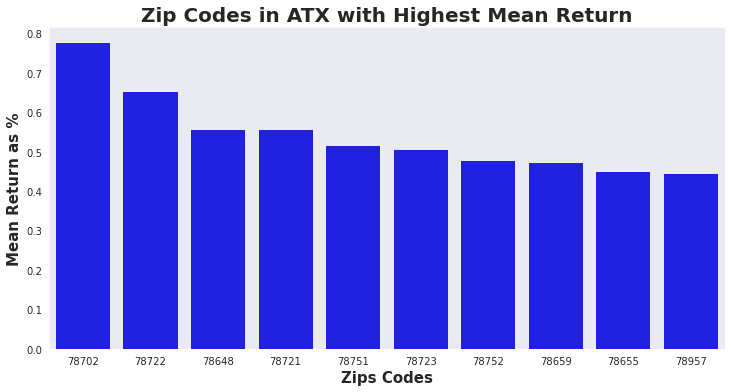

In [56]:
with sns.axes_style('dark'):
    fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_10_returns.index,
            y=top_10_returns.values*100,
            order=top_10_returns.index,
            color='b')
plt.tight_layout()
ax.set_xlabel('Zips Codes', fontsize=15, fontweight='bold')
ax.set_ylabel('Mean Return as %', fontsize=15, fontweight='bold')
ax.set_title("Zip Codes in ATX with Highest Mean Return", fontsize=20, fontweight='bold');

In [57]:
top_10_returns

78702    0.007769
78722    0.006511
78648    0.005556
78721    0.005548
78751    0.005138
78723    0.005052
78752    0.004759
78659    0.004706
78655    0.004484
78957    0.004434
dtype: float64

In [58]:
# Plotting Top 10 Zip Codes based on highest mean return
ATX = folium.Map(location=[30.2672, -97.7431])

tooltip = "Click me!"
folium.Marker([30.2604, -97.7145], popup="<i>Zip Code 78702 Mean Return: 0.7769%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2920, -97.7118], popup="<i>Zip Code 78722 Mean Return: 0.6511%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([29.7065, -97.6548], popup="<i>Zip Code 78648 Mean Return: 0.5556%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2737, -97.6819], popup="<i>Zip Code 78721 Mean Return: 0.5548%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.3056, -97.7254], popup="<i>Zip Code 78751 Mean Return: 0.5138%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.3081, -97.6819], popup="<i>Zip Code 78723 Mean Return: 0.5052%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.3317, -97.7052], popup="<i>Zip Code 78752 Mean Return: 0.4759%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.2198, -97.1144], popup="<i>Zip Code 78659 Mean Return: 0.4706%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([29.8101, -97.8504], popup="<i>Zip Code 78655 Mean Return: 0.4484%</i>", tooltip=tooltip).add_to(ATX)
folium.Marker([30.0118, -97.1359], popup="<i>Zip Code 78957 Mean Return: 0.4434%</i>", tooltip=tooltip).add_to(ATX)

ATX

In [59]:
import json

In [60]:
with open('../../Data/austin_area_zip_codes.geojson') as f:
    geodata = json.load(f)

In [61]:
geodata['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [62]:
z = [i for i in geodata['features'][0]['properties']['zipcode']]

In [90]:
import plotly.express as px

In [94]:
df.head()

78660     78613     78704     78666     78745     78641  \
time                                                                     
1996-04-01  138900.0  169600.0  221300.0  103100.0  135000.0  153600.0   
1996-05-01  138600.0  169000.0  221100.0  103000.0  134200.0  152900.0   
1996-06-01  138400.0  168600.0  221000.0  103000.0  133800.0  152400.0   
1996-07-01  138500.0  168500.0  221000.0  103000.0  133800.0  152000.0   
1996-08-01  138700.0  168700.0  221300.0  103000.0  134000.0  151900.0   

               78758    78741     78753     78759     78664     78748  \
time                                                                    
1996-04-01  129000.0  93800.0  111300.0  266400.0  133100.0  199500.0   
1996-05-01  128300.0  93600.0  110600.0  269000.0  132700.0  198800.0   
1996-06-01  127500.0  93500.0  109900.0  272000.0  132400.0  197900.0   
1996-07-01  126900.0  93400.0  109200.0  275100.0  132100.0  196700.0   
1996-08-01  126300.0  93400.0  108600.0  278200.0  131900.0  195100.0   

               78681     78640     78665    78744     78749     78729  \
time                                                                    
1996-04-01  171000.0  112500.0  160700.0  85400.0  264000.0  163800.0   
1996-05-01  170900.0  111200.0  160300.0  85400.0  266400.0  163800.0   
1996-06-01  171000.0  110100.0  160100.0  85300.0  269300.0  163900.0   
1996-07-01  171500.0  109500.0  160200.0  85300.0  272400.0  164200.0   
1996-08-01  172300.0  109200.0  160500.0  85300.0  275500.0  164400.0   

               78610     78723     78727     78717     78731     78628  \
time                                                                     
1996-04-01  149200.0   97600.0  150300.0  200800.0  351100.0  170900.0   
1996-05-01  148600.0   99000.0  150200.0  200400.0  349000.0  170800.0   
1996-06-01  148200.0  100300.0  150300.0  200500.0  347900.0  170800.0   
1996-07-01  148100.0  101400.0  150600.0  201100.0  347900.0  170900.0   
1996-08-01  148100.0  101900.0  151000.0  202300.0  349100.0  171100.0   

               78705     78633     78703     78728     78750     78626  \
time                                                                     
1996-04-01  197500.0  166100.0  355200.0  136600.0  266200.0  132900.0   
1996-05-01  199300.0  166200.0  351300.0  136500.0  267800.0  132700.0   
1996-06-01  201000.0  166500.0  347800.0  136400.0  269500.0  132500.0   
1996-07-01  202700.0  167100.0  344900.0  136300.0  271100.0  132300.0   
1996-08-01  204300.0  167900.0  342400.0  136100.0  272600.0  132200.0   

              78602     78746     78634     78757    78702     78734  \
time                                                                   
1996-04-01  74400.0  493300.0  133200.0  150300.0  55600.0  224200.0   
1996-05-01  74700.0  496600.0  132800.0  150900.0  56700.0  225300.0   
1996-06-01  75100.0  500100.0  132400.0  152100.0  57900.0  226600.0   
1996-07-01  75700.0  503500.0  132200.0  153600.0  59300.0  228100.0   
1996-08-01  76200.0  506800.0  132100.0  155300.0  60800.0  229800.0   

               78738     78751     78735    78621     78754    78752  \
time                                                                   
1996-04-01  337100.0  115900.0  772100.0  82700.0  133100.0  87200.0   
1996-05-01  333800.0  116900.0  765800.0  82900.0  132900.0  87000.0   
1996-06-01  330400.0  118000.0  760200.0  83100.0  132800.0  86800.0   
1996-07-01  327000.0  119100.0  755200.0  83400.0  132600.0  86700.0   
1996-08-01  323900.0  120200.0  751100.0  83700.0  132500.0  86500.0   

               78653    76574    78644     78620     78676     78617    78724  \
time                                                                            
1996-04-01  120100.0  85900.0  52500.0  213300.0  155900.0  121900.0  97500.0   
1996-05-01  118300.0  86100.0  52800.0  213300.0  155700.0  120500.0  96900.0   
1996-06-01  116500.0  86300.0  53100.0  213400.0  155600.0  119000.0  96200.0   
1996-07-01  114800.

In [125]:
fig = px.choropleth(df, geojson=geodata, locations=df.columns, 
                    featureidkey='properties.zipcode')

fig.show()

# Step 4: Reshape from Wide to Long Format

In [64]:
data_2 = pd.read_csv('../../Data/recent_zillow_data.csv')
data_2

RegionID  SizeRank                          RegionName RegionType  \
0      102001         0                       United States    Country   
1      394913         1                        New York, NY        Msa   
2      753899         2  Los Angeles-Long Beach-Anaheim, CA        Msa   
3      394463         3                         Chicago, IL        Msa   
4      394514         4               Dallas-Fort Worth, TX        Msa   
..        ...       ...                                 ...        ...   
904    394767       929                          Lamesa, TX        Msa   
905    753874       930                           Craig, CO        Msa   
906    394968       931                           Pecos, TX        Msa   
907    395188       932                          Vernon, TX        Msa   
908    394743       933                       Ketchikan, AK        Msa   

    StateName  2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  \
0         NaN    127569.0    127914.0    128277.0    129016.0    129762.0   
1          NY    225438.0    226785.0    227997.0    230383.0    232604.0   
2          CA    231209.0    232014.0    233247.0    235592.0    238105.0   
3          IL    170602.0    171004.0    171525.0    172568.0    173673.0   
4          TX    130189.0    130293.0    130379.0    130591.0    130813.0   
..        ...         ...         ...         ...         ...         ...   
904        TX         NaN         NaN         NaN         NaN         NaN   
905        CO     95358.0     95704.0     96290.0     96987.0     97707.0   
906        TX         NaN         NaN         NaN         NaN         NaN   
907        TX         NaN         NaN         NaN         NaN         NaN   
908        AK         NaN         NaN         NaN         NaN         NaN   

     2000-06-30  2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  \
0      130505.0    131263.0    132072.0    132897.0    133728.0    134566.0   
1      234969.0    237454.0    240026.0    242606.0    245159.0    247613.0   
2      240479.0    242910.0    245461.0    247891.0    250113.0    252170.0   
3      174768.0    175979.0    177338.0    178743.0    180125.0    181380.0   
4      130998.0    131197.0    131563.0    132018.0    132548.0    133032.0   
..          ...         ...         ...         ...         ...         ...   
904         NaN         NaN         NaN         NaN         NaN         NaN   
905     98250.0     99351.0    100029.0    100163.0     99743.0    100402.0   
906         NaN         NaN         NaN         NaN         NaN         NaN   
907         NaN         NaN         NaN         NaN         NaN         NaN   
908         NaN         NaN         NaN         NaN         NaN         NaN   

     2000-12-31  2001-01-31  2001-02-28  2001-03-31  2001-04-30  2001-05-31  \
0      135425.0    136226.0    136963.0    137712.0    138511.0    139335.0   
1      249910.0    252122.0    254555.0    256934.0    259418.0    261773.0   
2      254337.0    256001.0    257805.0    259727.0    262406.0    265034.0   
3      182607.0    183756.0    184773.0    185926.0    187060.0    188457.0   
4      133525.0    133737.0    133416.0    133135.0    133016.0    133234.0   
..          ...         ...         ...         ...         ...         ...   
904         NaN         NaN         NaN         NaN         NaN         NaN   
905    101533.0    102770.0    103233.0    103900.0    104679.0    105708.0   
906         NaN         NaN         NaN         NaN         NaN         NaN   
907         NaN         NaN         NaN         NaN         NaN         NaN   
908         NaN         NaN         NaN         NaN         NaN         NaN   

     2001-06-30  2001-07-31  2001-08-31  2001-09-30  2001-10-31  2001-11-30  \
0      140143.0    140958.0    141800.0    142634.0    143473.0    144241.0   
1      264319.0    266796.0    269475.0    272188.0    275180.0    277937.0   
2      267457.0    269935.0    272519.0    275198.0    2

In [65]:
tx_df = data_2[data_2['StateName'] == 'TX']

In [66]:
co_df = data_2[data_2['StateName'] == 'CO']

In [67]:
co_df

RegionID  SizeRank             RegionName RegionType StateName  \
21     394530        21             Denver, CO        Msa        CO   
80     394484        80   Colorado Springs, CO        Msa        CO   
159    394602       159       Fort Collins, CO        Msa        CO   
162    394405       162            Boulder, CO        Msa        CO   
177    394645       177            Greeley, CO        Msa        CO   
253    395007       253             Pueblo, CO        Msa        CO   
280    394639       280     Grand Junction, CO        Msa        CO   
465    753881       466   Glenwood Springs, CO        Msa        CO   
574    394556       577            Edwards, CO        Msa        CO   
579    394547       582            Durango, CO        Msa        CO   
614    394437       618         Cañon City, CO        Msa        CO   
675    394876       681           Montrose, CO        Msa        CO   
817    394606       835        Fort Morgan, CO        Msa        CO   
819    753871       837       Breckenridge, CO        Msa        CO   
853    753921       872  Steamboat Springs, CO        Msa        CO   
862    395130       881           Sterling, CO        Msa        CO   
905    753874       930              Craig, CO        Msa        CO   

     2000-01-31  2000-02-29  2000-03-31  2000-04-30  2000-05-31  2000-06-30  \
21     198252.0    199596.0    200761.0    203354.0    205788.0    208374.0   
80     163697.0    164040.0    164295.0    164907.0    165510.0    166225.0   
159    196690.0    196409.0    197265.0    198551.0    200568.0    202197.0   
162    242225.0    243517.0    245037.0    248090.0    251137.0    254534.0   
177    200369.0    200790.0    199874.0    199293.0    198921.0    200125.0   
253    110988.0    111120.0    111323.0    111786.0    112365.0    112956.0   
280    143992.0    144082.0    142166.0    141197.0    140365.0    141722.0   
465    227423.0    228382.0    229426.0    231375.0    233215.0    235133.0   
574    363276.0    364319.0    365887.0    368754.0    371821.0    374698.0   
579         NaN         NaN         NaN         NaN         NaN         NaN   
614         NaN         NaN         NaN         NaN         NaN         NaN   
675    125078.0    125458.0    125836.0    126516.0    127327.0    128087.0   
817         NaN         NaN         NaN         NaN         NaN         NaN   
819         NaN         NaN         NaN         NaN         NaN         NaN   
853    235776.0    236588.0    237682.0    240151.0    242848.0    245567.0   
862     85311.0     85384.0     85521.0     85947.0     86608.0     87384.0   
905     95358.0     95704.0     96290.0     96987.0     97707.0     98250.0   

     2000-07-31  2000-08-31  2000-09-30  2000-10-31  2000-11-30  2000-12-31  \
21     210789.0    213439.0    216180.0    218850.0    221548.0    224090.0   
80     167105.0    168006.0    169074.0    170122.0    171308.0    172507.0   
159    203679.0    205399.0    207199.0    209376.0    211326.0    213306.0   
162    258832.0    264201.0    269022.0    273436.0    276435.0    279211.0   
177    201610.0    203444.0    205377.0    207772.0    209647.0    211036.0   
253    113501.0    113964.0    114396.0    114686.0    115010.0    115411.0   
280    142208.0    142866.0    143475.0    144260.0    144797.0    145422.0   
465    237355.0    239938.0    242489.0    245187.0    247326.0    249776.0   
574    377639.0    380571.0    383282.0    383296.0    382537.0    381852.0   
579         NaN         NaN         NaN         NaN         NaN         NaN   
614         NaN         NaN         NaN         NaN         NaN         NaN   
675    128859.0    129567.0    130382.0    131310.0    132252.0    133157.0   
817         NaN         NaN         NaN         NaN         NaN         NaN   
819         NaN         NaN         NaN         NaN         NaN         NaN   
853    247846.0    250079.0    251852.0    253665.0    255557.0    257696.0   
862     87979.0     88394.0     88803.0

In [68]:
# Filtering to only include data from January, 2009 through April, 2018
df_final = df[df.index.year > 2008]

In [69]:
df_final

78660     78613     78704     78666     78745     78641  \
time                                                                     
2009-01-01  172600.0  205300.0  366200.0  141500.0  172100.0  175900.0   
2009-02-01  172300.0  205000.0  365200.0  140700.0  172200.0  175400.0   
2009-03-01  172000.0  204700.0  363900.0  139800.0  172100.0  174900.0   
2009-04-01  171600.0  204600.0  362400.0  138900.0  171600.0  174500.0   
2009-05-01  171300.0  204300.0  361000.0  138100.0  171100.0  174200.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  239400.0  296200.0  539800.0  197500.0  290500.0  251200.0   
2018-01-01  240000.0  295900.0  540200.0  197900.0  291300.0  251900.0   
2018-02-01  241000.0  296400.0  542300.0  200100.0  292600.0  252800.0   
2018-03-01  242200.0  297500.0  547100.0  203800.0  294000.0  253700.0   
2018-04-01  242800.0  297300.0  550900.0  206500.0  294700.0  254100.0   

               78758     78741     78753     78759     78664     78748  \
time                                                                     
2009-01-01  143400.0  144100.0  135000.0  307600.0  146600.0  186600.0   
2009-02-01  143400.0  143600.0  134900.0  307100.0  146200.0  186800.0   
2009-03-01  143500.0  143100.0  134700.0  306600.0  145800.0  186700.0   
2009-04-01  143400.0  142600.0  134500.0  306300.0  145200.0  186500.0   
2009-05-01  143300.0  142300.0  134200.0  305900.0  144500.0  186200.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  250500.0  238300.0  225000.0  442400.0  209600.0  276700.0   
2018-01-01  255100.0  241000.0  227100.0  443200.0  210400.0  277800.0   
2018-02-01  260100.0  243600.0  228700.0  445000.0  212100.0  279000.0   
2018-03-01  266000.0  247400.0  231500.0  449900.0  214900.0  280800.0   
2018-04-01  270400.0  250400.0  233400.0  454100.0  217300.0  282000.0   

               78681     78640     78665     78744     78749     78729  \
time                                                                     
2009-01-01  203900.0  150600.0  192600.0  114400.0  231300.0  189700.0   
2009-02-01  203700.0  149900.0  191800.0  114500.0  231100.0  189700.0   
2009-03-01  203500.0  149300.0  191100.0  114400.0  230800.0  189400.0   
2009-04-01  203300.0  148800.0  190300.0  114300.0  230200.0  188900.0   
2009-05-01  203000.0  148200.0  189400.0  114200.0  229500.0  188500.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  291500.0  205100.0  258900.0  190900.0  348900.0  294000.0   
2018-01-01  292600.0  204900.0  258900.0  192100.0  349700.0  295800.0   
2018-02-01  293800.0  205700.0  259500.0  193200.0  352100.0  298600.0   
2018-03-01  295200.0  207800.0  260100.0  194500.0  355500.0  301600.0   
2018-04-01  296000.0  208900.0  259900.0  195500.0  357700.0  303300.0   

               78610     78723     78727     78717     78731     78628  \
time                                                                     
2009-01-01  190200.0  205000.0  191400.0  250900.0  438900.0  231200.0   
2009-02-01  189500.0  205300.0  191100.0  250200.0  437400.0  230300.0   
2009-03-01  188800.0  205500.0  190700.0  249500.0  436000.0  229600.0   
2009-04-01  188100.0  206000.0  190200.0  248800.0  434400.0  229300.0   
2009-05-01  187500.0  206600.0  189600.0  248100.0  432200.0  228900.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  258000.0  352500.0  309300.0  355100.0  581700.0  308600.0   
2018-01-01  256900.0  355800.0  311800.0  356600.0  578400.0  309000.0   
2018-02-01  257200.0  358700.0  313400.0  359500.0  581900.0  310600.0   
2018-03-01  258900.0  361900.0  315200.0  362300.0  596700.0  313900.0   
2018-04-01  260000.0  364200.0  316500.0  363600.0  610500.0  316800.0   

               78705     78633     78703     78728     78750     78626  \
time                                                                     
2009-01-01  407

In [70]:
# No missing values
df_final.isna().sum().sum()

0

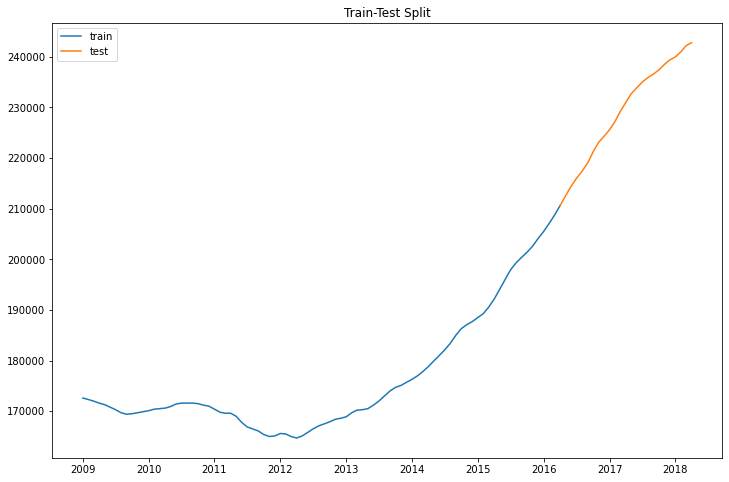

In [71]:
cutoff = '2016-04-01'
cutoff

# Define train and test sets according to the index found above
train = df_final[78660][:cutoff]

test = df_final[78660][cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [72]:
fuller_test_2(df_final)

[(78665, 0.3435817427733815),
 (78610, 0.35119828647310786),
 (78660, 0.47444144079204786),
 (78725, 0.8260359249907803),
 (78641, 0.8438892379795536),
 (78739, 0.8490965153012324),
 (78653, 0.8671327111113607),
 (78640, 0.8723674568376986),
 (78752, 0.9036510820726502),
 (78652, 0.9100276745990518),
 (78746, 0.9142906280175239),
 (78728, 0.9198364678487632),
 (78738, 0.9322832384260245),
 (78613, 0.9343098582167808),
 (78757, 0.9377530745391199),
 (78664, 0.9485562558513079),
 (78681, 0.9510316312170741),
 (78730, 0.9512109533137715),
 (78634, 0.9538418151253493),
 (78722, 0.9551542254954772),
 (78705, 0.9564190011146592),
 (78735, 0.9609391947736278),
 (78732, 0.9613078165366195),
 (78751, 0.9615551303243628),
 (78727, 0.9643910264815171),
 (78633, 0.9694562673616228),
 (78756, 0.9698924643626973),
 (78726, 0.9703215252404611),
 (78748, 0.9755959444332182),
 (78759, 0.9756750693294471),
 (76574, 0.9760622191671297),
 (78724, 0.978051738555911),
 (78745, 0.9787790622721828),
 (78704, 

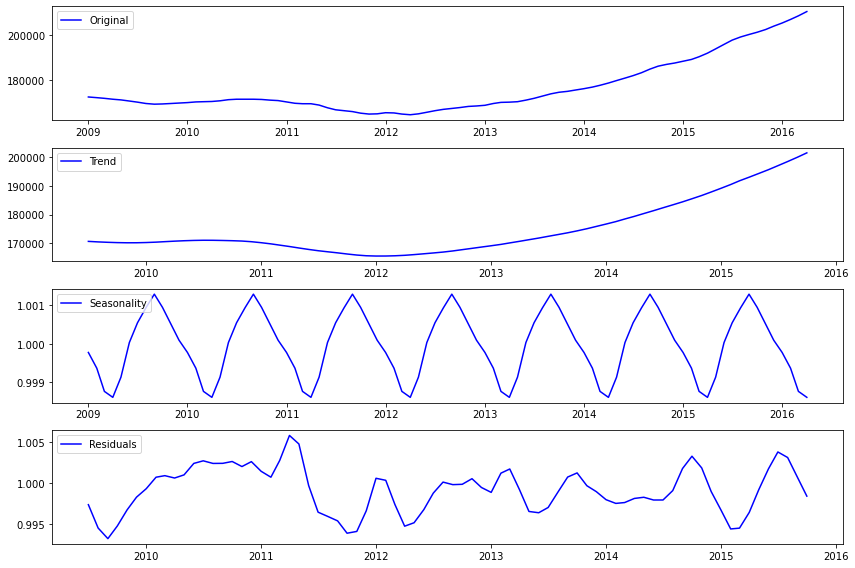

In [73]:
# From Topic 37: "Time Series Decomposition"
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train,model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(train, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [74]:
residual.dropna(inplace=True)

In [75]:
adfuller(residual)

(-2.748306851013722,
 0.06604555231973105,
 8,
 67,
 {'1%': -3.5319549603840894,
  '5%': -2.905755128523123,
  '10%': -2.5903569458676765},
 -680.6733636377525)

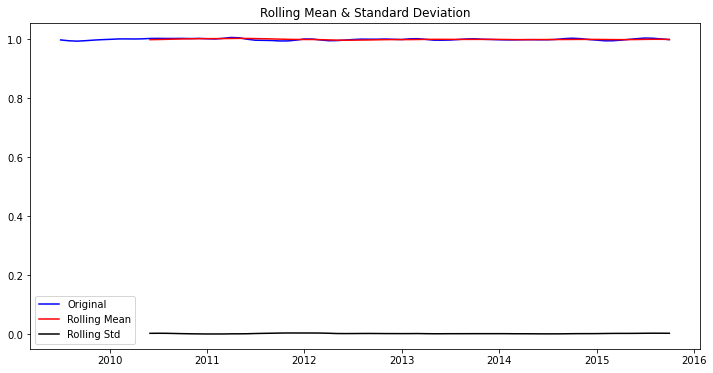

Results of Dickey-Fuller Test: 

Test Statistic                 -2.748307
p-value                         0.066046
#Lags Used                      8.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [76]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=12, center=False).mean()
    roll_std = TS.rolling(window=12, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None
stationarity_check(residual)

# # Import 'passengers.csv' dataset
# data = pd.read_csv('passengers.csv')

# # Change the data type of the 'Month' column
# data['Month'] = pd.to_datetime(data['Month'])

# # Set the 'Month' column as the index
# ts = data.set_index('Month')

# # Plot the time series
# ts.plot(figsize=(10,4), color='blue');

In [77]:
import pmdarima as pm
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=100,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1215.454, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1217.232, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1217.073, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1214.184, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1219.095, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.592 seconds


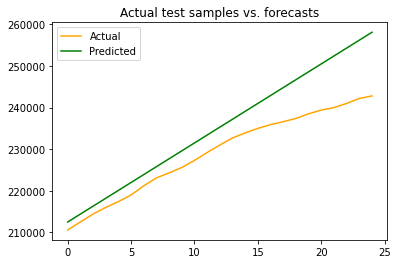

In [78]:
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.plot(x, test, color='orange', label='Actual')
plt.plot(x, arima.predict(n_periods=test.shape[0]), color='green', label='Predicted')
plt.title('Actual test samples vs. forecasts')
plt.legend()
plt.show()

In [79]:
# metrics  - Copy from TS review
from sklearn import metrics

# Note - we're back to regression metrics!
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", metrics.mean_squared_error(y_true, y_pred, squared=False))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))
    

report_metrics(test, arima.predict(n_periods=test.shape[0]))

Explained Variance:
	 0.8227843953271181
MAE:
	 6220.0
RMSE:
	 7482.913870946264
r^2:
	 0.4266011829665919


<AxesSubplot:xlabel='time'>

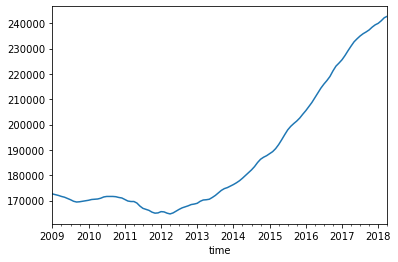

In [80]:
df_final[78660].plot()

In [81]:
n_test

12

In [82]:
grid_search(df_final[78660], cfg_list, n_test=12)

 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
 > 1027.132
> Model[1] 1027.132
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
 > 7175.073
> Model[6] 7175.073
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
 > 16411.886
> Model[12] 16411.886
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
 > 35695.425
> Model[24] 35695.425
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
 > 51879.709
> Model[36] 51879.709


[('1', 1027.1319292087069),
 ('6', 7175.072589644418),
 ('12', 16411.885936722807),
 ('24', 35695.42454339679),
 ('36', 51879.70862164384)]

# Step 5: ARIMA Modeling

In [83]:
# Copied from Aidan/Melissa
def melt_row(i):
    row = data.iloc[i:i+1]
    row_name = list(row.iloc[:, 2])[0]
    row_melted = melt_data(row)
    return row_name, row_melted

In [84]:
def test_stationarity(series_i):
    test_results = adfuller(series_i)
    return test_results[0]

In [85]:
def log_transform(series_i):
    log_transformed = np.log(series_i)
    dropped_nans = log_transformed.dropna()
    return dropped_nans

In [86]:
def run_auto_arima(series_i):
    
    gridsearch = auto_arima(series_i,
                            start_p = 0,
                            max_p = 3,
                            d = 0, 
                            max_d = 3, 
                            start_q = 0,
                            max_q = 3,
                            seasonal=True,
                            m = 12,
                            suppress_warnings=True)
    
    model = ARIMA(series_i, 
                  order = gridsearch.order, 
                  seasonal_order = gridsearch.seasonal_order,
                  enforce_stationarity=False)
    
    # print(gridsearch.order, gridsearch.seasonal_order)
    
    return model.fit()

In [87]:
def make_prediction(model, start, end):
    prediction = model.predict(start, end)
    return prediction

In [88]:
def run_arima_model(i, start, end):
    
    row_name, row_series = melt_row(i)
    
    log_row_series = log_transform(row_series)
    
    model = run_auto_arima(log_row_series)
    
    log_prediction = model.predict(start, end)
    
    prediction = e ** log_prediction
    
    prediction_df = pd.DataFrame(prediction.values, prediction.index)
    
    return row_name, row_series, prediction_df

In [89]:
name, original_series, prediction_series = run_arima_model(0, 0, 273)

fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(original_series)
plt.plot(prediction_series[5:])
plt.title(name)
plt.legend(['Original','Predicted'], loc='lower right')
plt.xlabel('Year')
plt.ylabel('Median Home Price')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# Step 6: Interpreting Results